In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from logo import Logo
import logo_comparison
from logo_comparison import *

import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Loading the data
data_dfs = dict()

In [45]:
for i in [1]:

    applicant_loc = f'/Users/aaronrasin/Desktop/Logo/Logos/applicant_{i}'
    applicant_logo_names = os.listdir(applicant_loc)
    applicant_logos = list()

    previous_loc = f'/Users/aaronrasin/Desktop/Logo/Logos/previous_{i}'
    previous_logo_names = os.listdir(previous_loc)
    previous_logos = list()
    
    
    # Analyzing logo individually
    print(f"Initializing applicant logos (Test Set {i})")
    for applicant in tqdm(applicant_logo_names):
        if applicant != '.DS_Store':
            applicant_logos.append(Logo(applicant_loc + '/' + applicant))
            
    print(f"Initializing previous logos (Test Set {i})")
    for previous in tqdm(previous_logo_names):
        if previous != '.DS_Store':
            previous_logos.append(Logo(previous_loc + '/' + previous))
    
    
    # Comparing applicants and previous logos
    df = compare_logos(applicant_logos, previous_logos)
    
    # Scale the similarity scores (SSIM, Color, and Template)
#     df = scale_scores(df, features = ['SSIM', 'Color Similarity Score', 'Template Matching'])
    
    data_dfs[f'df{i}'] = df

Initializing applicant logos (Test Set 1)


100%|███████████████████████████████████████████| 24/24 [01:09<00:00,  2.89s/it]


Initializing previous logos (Test Set 1)


100%|███████████████████████████████████████████| 35/35 [00:48<00:00,  1.39s/it]


Comparing logos


100%|███████████████████████████████████████████| 23/23 [06:07<00:00, 15.99s/it]


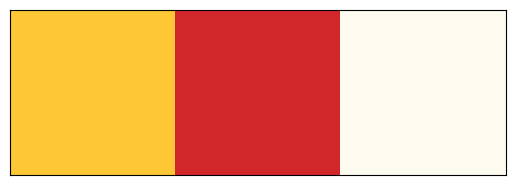

{(253, 199, 53): 0.766110248447205,
 (210, 39, 42): 0.10413431677018634,
 (253, 251, 239): 0.1297554347826087}

In [46]:
dhl_f = applicant_logos[13]
dhl_f.show_colors()
dhl_f.colors

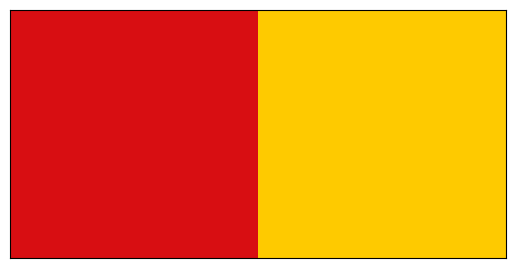

{(216, 14, 18): 0.11068262411347518, (254, 202, 0): 0.8893173758865248}

In [47]:
dhl = previous_logos[25]
dhl.show_colors()
dhl.colors

In [48]:
logo_comparison.calculate_color_similarity(dhl, dhl_f)

48.65652656902339

In [49]:
previous_logos

[Gucci.png,
 Puma.png,
 HomeDepot.png,
 miumiu.png,
 CalvinKlein.png,
 BaskinRobbins.png,
 BurgerKing.png,
 LG.png,
 theatre.png,
 shell.png,
 Chanel.png,
 lego.png,
 Nike.png,
 GiorgioArmani.jpeg,
 Visa.png,
 Stussy.png,
 TomFord.jpeg,
 Pepsi.png,
 HarleyDavidson.png,
 Ikea.png,
 Lowe's.png,
 Dior.png,
 Versace.png,
 ebay.png,
 Palace.png,
 DHL.png,
 Champion.png,
 DonnaKaran.png,
 DunkinDonuts.png,
 Youtube.png,
 MarcJacobs.png,
 PizzaHut.png,
 McDonald's.png,
 YvesSaintLaurent.png,
 GiorgoArmani DunkinDonuts (fake).png]

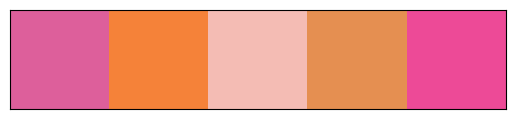

{(221, 95, 155): 0.13491162639857304,
 (245, 130, 57): 0.2670666450462137,
 (244, 188, 180): 0.16085616993676016,
 (229, 143, 81): 0.16636938543862495,
 (237, 74, 151): 0.2707961731798281}

In [50]:
dd_f = applicant_logos[0]
dd_f.show_colors()
dd_f.colors

In [79]:
dd = previous_logos[28]

In [83]:
gucci = previous_logos[0]

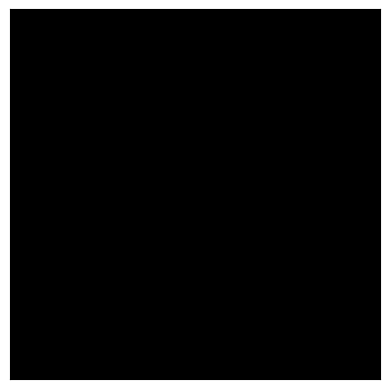

{(0, 0, 0): 0.0}

In [86]:
gucci.colors = gucci.color_detect(include_white = False)
gucci.show_colors()
gucci.colors

{(255, 255, 255): 0.79364013671875, (0, 0, 0): 0.20635986328125}

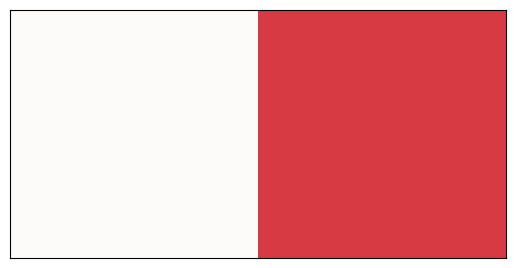

In [80]:

dd.colors = dd.color_detect(include_white = True)
dd.show_colors()

In [ ]:
dd = previous_logos[28]
dd.show_colors()

In [ ]:
mcd_f = applicant_logos[2]
mcd_f.show_colors()
mcd_f.colors

In [ ]:
logo_comparison.calculate_color_similarity(dd, dd_f)

In [ ]:
logo_comparison.calculate_color_similarity(dd, mcd_f)

In [ ]:
df3 = data_dfs['df3']
df3

In [ ]:
# df.to_excel('/Users/aaronrasin/Desktop/Logo/LogoComparisonData.xlsx', index=False)

In [ ]:
df1

In [ ]:
df1 = list(data_dfs.values())[1]

prev_color = df1[['Previous Logo', 'Color Similarity Score']]
appl_color = df1[['Applicant Logo', 'Color Similarity Score']]
thing = (appl_color.groupby('Applicant Logo')
         .max()
         .reset_index()
         .merge(prev_color)
         .drop_duplicates()
         .iloc[:50])

thing.sort_values('Color Similarity Score', ascending=False)


In [ ]:
dd_colors = applicant_logos[29].color_detect()

In [ ]:
dd_colors

In [ ]:
plt.imshow([list(dd_colors.keys())])
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
bridgestone = applicant_logos[0]
bridgestone.color_detect(include_white=True)
bridgestone.show_colors()

In [ ]:
previous_logos[4].colors = previous_logos[4].color_detect(include_white=True)
# previous_logos[4].show_colors()


In [ ]:
for logo in applicant_logos:
    print(logo.name, logo.colors)
    logo.show_colors()

In [ ]:
for logo in previous_logos:
    print(logo.name, logo.colors)
    logo.show_colors()

In [ ]:
previous_logos[29].colors = previous_logos[29].color_detect(include_white=True)
previous_logos[29].colors

In [ ]:
previous_logos[7].colors = previous_logos[7].color_detect(include_white=False)
previous_logos[7].colors

In [ ]:
for logo in previous_logos:
    print(logo.name)
    logo.show_colors()

# Time Complexity

- 1-2 seconds to initialize each logo (1.5 on average)
- 1-2 seconds to compare two logos (1.5 on average)
- So runtime of whole program can be calculated using this formula (plug in number of applicants (a) and number of previous (p))

$$\large \text{number of minutes} \approx \frac {(a+p) + (a \cdot p)}{60}$$

## Template matching should be scaled! 
The first DataFrame shows how inaccurate template matching is when a single threshold is set for all pairs. However, when you look at the highest template matching score for each applicant logo, results are significantly better. 

### Top 16 Template Matches (3 actual matches)

In [ ]:
df4 = data_dfs['df4']
df4[['Applicant Logo', 'Template Matching', 'Previous Logo']].sort_values('Template Matching', ascending = False).iloc[:16]

### Highest Template Match for each of 16 applicants (7 actual matches)

In [ ]:
prev_template = df4[['Previous Logo', 'Template Matching']]
appl_template = df4[['Applicant Logo', 'Template Matching']]
appl_template.groupby('Applicant Logo').max().reset_index().merge(prev_template)

In [ ]:
for logo in previous_logos:
    print(logo.name, logo.text)

In [ ]:
applicant_logos[6].colors

In [ ]:
logoA = applicant_logos[5]
logoA

In [ ]:
test

In [ ]:
calculate_logo_shape_complexity_similarity(logoA, test)

In [ ]:
plt.imshow(ck.image, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
ck = applicant_logos[15]

In [ ]:
resized = imutils.resize(ck.image, width=300)

# Blurring the image
ck.blurred = cv2.GaussianBlur(resized, (5,5), 0)

# Setting all pixels to white or black
binary_image = ck.image_to_binary()

plt.imshow(binary_image, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
logoA = dd
logoB = dd_f

In [ ]:
logoA.show_colo
logoA.colors

In [ ]:
if len(logoA.colors.keys()) >= len(logoB.colors.keys()):
    short = logoA.colors
    long = logoB.colors
else:
    short = logoB.colors
    long = logoA.colors
    
# Define a dictionary with column A 
data1 = {'short_color': list(logoA.colors)}  
     
# Define another dictionary with column B 
data2 = {'B': ['a', 'b', 'c']}   
   
# Convert the dictionary into DataFrame   
df = pd.DataFrame(data1, index =[0, 1]) 
   
# Convert the dictionary into DataFrame   
df1 = pd.DataFrame(data2, index =[2, 3, 4])  
  
# Now to perform cross join, we will create 
# a key column in both the DataFrames to  
# merge on that key. 
df['key'] = 1
df1['key'] = 1
  
# to obtain the cross join we will merge  
# on the key and drop it. 
result = pd.merge(df, df1, on ='key').drop("key", 1) 
  
result 